# Analysis of PPO in Ethanol.

In [1]:
%pylab
import FluorSpec.PTI_Data
import FluorSpec.FitTools
import os
%matplotlib inline

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


## David took measurements beginning 160830

### Lets put all of the data in dictionaries keyed by the excitation wavelength.
I'm not certain how the wavelength calibration was done with these data: it appears from David's notes that the wavelength calibration was left in place from the previous measurements (where it was definitely done), so that should be fine.

There was another monochromator calibration done prior to acquiring the box data, as there is a different shift depending on whether you measure in the box or the sphere -- it appears that this second calibration only applies to the 0.31 g/L PPO in EtOH data.

In [37]:
basepath = 'C:\\Users\\Samsung\\Documents\\GitHub\\QY\\Henry\\Sphere\\PPO_ETOH\\'

#Solvent Data
solventpaths = [basepath + 'EmissionScan_ETOH_ex{0}_2sec_160830.txt'.format(310 + i*10) for i in range(4)]
SolventData = {310 + i*10: FluorSpec.PTI_Data.PTI_Data(path) for i, path in enumerate(solventpaths)}

#0.31 g/L PPO in EtOH data
PPOEtOH031_paths = [basepath + 'EmissionScan_0x31gperL_PPOinETOH_ex{0}_2sec_160831.txt'.format(310 + i*10) for i in range(4)]
PPOinEtOH_0x31gL = {310 + i*10: FluorSpec.PTI_Data.PTI_Data(path) for i, path in enumerate(PPOEtOH031_paths)}

#3.14 g/L PPO in EtOH data
PPOEtOH314_paths = [basepath + 'EmissionScan_3x14gperL_PPOinETOH_ex{0}_2sec_160831.txt'.format(310 + i*10) for i in range(4)]
PPOinEtOH_3x14gL = {310 + i*10: FluorSpec.PTI_Data.PTI_Data(path) for i, path in enumerate(PPOEtOH314_paths)}

basepath = 'C:\\Users\\Samsung\\Documents\\GitHub\\QY\\Henry\\Emission\\PPOetoh\\Sept\\'

#Box emissions, 0.31 g/L PPO in EtOH
boxPPOEtOH031_paths = [basepath + 'EmissionScan_0x31gperL_PPOinETOH_ex{0}_2sec_160902.txt'.format(310 + i*10) for i in range(4)]
boxPPOinEtOH_0x31gL = {310 + i*10: FluorSpec.PTI_Data.PTI_Data(path) for i, path in enumerate(boxPPOEtOH031_paths)}

#Box emissions, 3.14 g/L PPO in EtOH
boxPPOEtOH314_paths = [basepath + 'EmissionScan_3x14gperL_PPOinETOH_ex{0}_2sec_160901.txt'.format(310 + i*10) for i in range(4)]
boxPPOinEtOH_3x14gL = {310 + i*10: FluorSpec.PTI_Data.PTI_Data(path) for i, path in enumerate(boxPPOEtOH314_paths)}

Initializing PTI_Data at Wed Oct  5 18:41:47 2016
Initializing PTI_Data at Wed Oct  5 18:41:47 2016
Initializing PTI_Data at Wed Oct  5 18:41:47 2016
Initializing PTI_Data at Wed Oct  5 18:41:47 2016
Initializing PTI_Data at Wed Oct  5 18:41:47 2016
Initializing PTI_Data at Wed Oct  5 18:41:47 2016
Initializing PTI_Data at Wed Oct  5 18:41:47 2016
Initializing PTI_Data at Wed Oct  5 18:41:47 2016
Initializing PTI_Data at Wed Oct  5 18:41:47 2016
Initializing PTI_Data at Wed Oct  5 18:41:47 2016
Initializing PTI_Data at Wed Oct  5 18:41:47 2016
Initializing PTI_Data at Wed Oct  5 18:41:47 2016
Initializing PTI_Data at Wed Oct  5 18:41:47 2016
Initializing PTI_Data at Wed Oct  5 18:41:47 2016
Initializing PTI_Data at Wed Oct  5 18:41:47 2016
Initializing PTI_Data at Wed Oct  5 18:41:47 2016
Initializing PTI_Data at Wed Oct  5 18:41:47 2016
Initializing PTI_Data at Wed Oct  5 18:41:47 2016
Initializing PTI_Data at Wed Oct  5 18:41:47 2016
Initializing PTI_Data at Wed Oct  5 18:41:47 2016


### Get the wavelength correction data for the sphere.
#### David took some data in the box as well, so I should include that!

Initializing PTI_Data at Wed Oct  5 12:25:48 2016
Initializing PTI_Data at Wed Oct  5 12:25:49 2016
Initializing PTI_Data at Wed Oct  5 12:25:49 2016
Initializing PTI_Data at Wed Oct  5 12:25:49 2016
Initializing PTI_Data at Wed Oct  5 12:25:49 2016


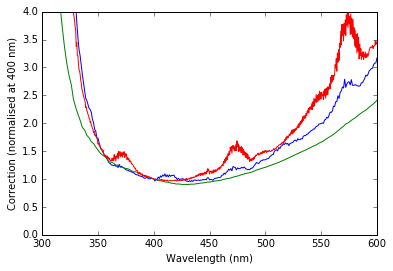

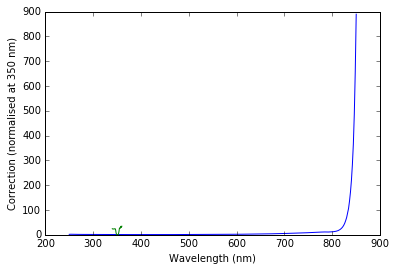

In [14]:
#mypath = "C:\\Users\\Samsung\\Desktop\\QY_Project\\Henry's Data\\Henry\\Sphere\\EmissionCorrection\\SyncScan_DefaultExcorr_NoExcorr.txt"
mypath = "C:\\Users\\Samsung\\Desktop\\QY_Project\\Henry's Data\\Henry\\Sphere\\EmissionCorrection\\SyncScan_ExcorrFile_NoExcorr.txt"
mypath2 = "C:\\Users\\Samsung\\Desktop\\QY_Project\\Henry's Data\\Henry\\Sphere\\EmissionCorrection\\SyncScan_ExcorrFile_NoEmcorr_160823.txt"
SyncScan = FluorSpec.PTI_Data.PTI_Data(mypath)
WLcorrection = (1/(np.array(SyncScan.FileSpecCorrected)))
fig = figure()
plot(SyncScan.WL, WLcorrection/(WLcorrection[SyncScan.WL.index(400)]), label="First Measurement")
ylim(0,4)
xlim(300,600)

mypath = "C:\\Users\\Samsung\\Documents\\GitHub\\FluorSpec\\correction_data\\emcorr-sphere-quanta.txt"
corrfile = FluorSpec.PTI_Data.PTI_Data(mypath)
WLcorrfile = (np.array(corrfile.Trace))
plot(corrfile.WL, WLcorrfile/(WLcorrfile[corrfile.WL.index(400)]), label="File Correction")

#Override the WLcorrection with the more recent data
SyncScan = FluorSpec.PTI_Data.PTI_Data(mypath2)
WLcorrection = (1/(np.array(SyncScan.FileSpecCorrected)))
plot(SyncScan.WL, WLcorrection/(WLcorrection[SyncScan.WL.index(400)]), label="Second Measurement")

xlabel("Wavelength (nm)")
ylabel("Correction (normalised at 400 nm)")

mypath = "C:\\Users\\Samsung\\Documents\\GitHub\\FluorSpec\\correction_data\\emcorri.txt"
corrfileBox = FluorSpec.PTI_Data.PTI_Data(mypath)
WLcorrfileBox = (np.array(corrfileBox.Trace))
fig = figure()
plot(corrfileBox.WL, WLcorrfileBox/(WLcorrfileBox[corrfileBox.WL.index(350)]), label="File Correction")

mypath3 = "C:\\Users\\Samsung\\Documents\\GitHub\\QY\\Henry\\SyncScans\\box_with_frosted_20160901.txt"
SyncScanBox = FluorSpec.PTI_Data.PTI_Data(mypath3)
WLcorrectionBox = (1/(np.array(SyncScanBox.FileSpecCorrected)))
plot(SyncScanBox.WL, WLcorrectionBox/(WLcorrectionBox[SyncScanBox.WL.index(350)]), label="SyncScan Measurement")

xlabel("Wavelength (nm)")
ylabel("Correction (normalised at 350 nm)")


#### I'm not sure what's going on with David's data; I'll ignore these data for now...

### Now lets plot some spectra to check out what we have...

Solvent spectra:

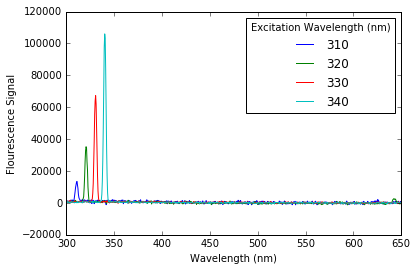

In [22]:
fig = figure()
[plot(SolventData[key].WL, SolventData[key].FileSpecCorrected, label=key) for key in sorted(SolventData)]
xlabel("Wavelength (nm)")
ylabel("Flourescence Signal")
legend(title="Excitation Wavelength (nm)")

sphere PPO in EtOH, 0.31 g/L

(0, 5000)

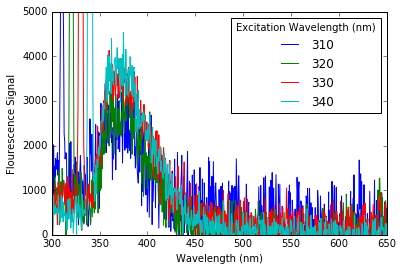

In [25]:
fig = figure()
[plot(PPOinEtOH_0x31gL[key].WL, PPOinEtOH_0x31gL[key].FileSpecCorrected, label=key) for key in sorted(PPOinEtOH_0x31gL)]
xlabel("Wavelength (nm)")
ylabel("Flourescence Signal")
legend(title="Excitation Wavelength (nm)")
ylim(0,5000)

sphere PPO in EtOH, 0.31 g/L

(0, 5000)

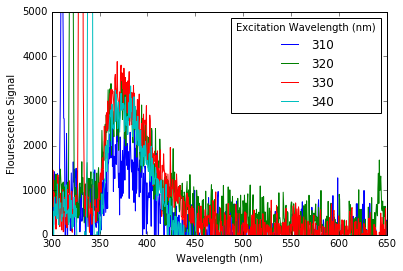

In [33]:
fig = figure()
[plot(PPOinEtOH_3x14gL[key].WL, PPOinEtOH_3x14gL[key].FileSpecCorrected, label=key) for key in sorted(PPOinEtOH_3x14gL)]
xlabel("Wavelength (nm)")
ylabel("Flourescence Signal")
legend(title="Excitation Wavelength (nm)")
ylim(0,5000)

Box, PPO in EtOH, 0.31 g/L

(0, 5000000)

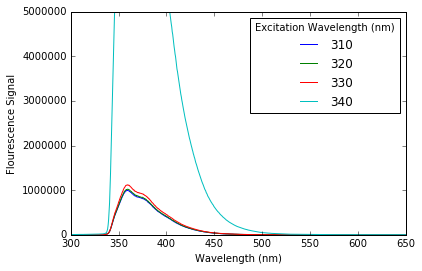

In [38]:
fig = figure()
[plot(boxPPOinEtOH_0x31gL[key].WL, boxPPOinEtOH_0x31gL[key].FileSpecCorrected, label=key) for key in sorted(boxPPOinEtOH_0x31gL)]
xlabel("Wavelength (nm)")
ylabel("Flourescence Signal")
legend(title="Excitation Wavelength (nm)")
ylim(0,5000000)

In [42]:
import matplotlib.pyplot as plt
import FluorSpec.PTI_Data
from scipy.integrate import trapz
import FluorSpec.FitTools

def CalcQY(solventpath, samplepath, templatepath, correctionpath, AbsWLmin, AbsWLmax, EmWLmin, EmWLmax, FitWLmin, FitWLmax, 
          FileWLCorr=False, makeplots=True, avglen=10, BLoffsetrange=slice(-10,-1), templateshift=0):
    '''
    Calculate the QY using measurement files.
    
    Provide paths to 'session' type files for solvent, sample, a template spectrum (for reabsorption correction), and a
    wavelength correction. Note that the wavelength correction file can either use a sync scan measurement through an empty
    sphere (default) or be one of the files provided by PTI (if FileWLCorr is True).
    
    Integration ranges are set by AbsWLmin/max and EmWLmin/max. The template is fitted to the measurement using FitWLmin/max.
    
    The remaining arguments cover plot creation, and the baseline averaging length.
    '''
    
    solventobj = FluorSpec.PTI_Data.PTI_Data(solventpath)
    sampleobj = FluorSpec.PTI_Data.PTI_Data(samplepath)
    template = FluorSpec.PTI_Data.PTI_Data(templatepath)
    solvent_BL, solvent_BLsub = FluorSpec.FitTools.subtractBL(solventobj.WL, list(solventobj.FileSpecCorrected), avglen)
                                   #list(solventobj.FileSpecCorrected - \
                                   #     np.mean(solventobj.FileSpecCorrected[BLoffsetrange])), avglen)
    sample_BL, sample_BLsub = FluorSpec.FitTools.subtractBL(sampleobj.WL, list(sampleobj.FileSpecCorrected), avglen)
                                   #list(sampleobj.FileSpecCorrected - \
                                   #     np.mean(sampleobj.FileSpecCorrected[BLoffsetrange])), avglen)
    correctionobj = FluorSpec.PTI_Data.PTI_Data(correctionpath)
    if FileWLCorr:
        WLcorrection = (np.array(correctionobj.Trace))
    else:
        WLcorrection = (1/(np.array(correctionobj.FileSpecCorrected)))

    WLcorr = np.interp(solventobj.WL, np.array(correctionobj.WL), WLcorrection)

    if makeplots:
        fig = plt.figure()
        yvals = solventobj.FileSpecCorrected-np.mean(solventobj.FileSpecCorrected[BLoffsetrange])
        plt.plot(solventobj.WL, yvals)
        plt.ylim(-max(yvals)/100,max(yvals)/20)
        plt.plot(sampleobj.WL, sampleobj.FileSpecCorrected-np.mean(sampleobj.FileSpecCorrected[BLoffsetrange]))
        plt.plot(solventobj.WL, solvent_BL)
        plt.plot(sampleobj.WL, sample_BL)

    solvent1 = (solventobj.FileSpecCorrected - solvent_BL)
    solvent = (solvent1 - np.mean(solvent1[BLoffsetrange]))*WLcorr
    Usolvent = solventobj.UFileSpecCorrected*WLcorr
    sample1 = (sampleobj.FileSpecCorrected - sample_BL)
    sample = (sample1 - np.mean(sample1[BLoffsetrange]))*WLcorr
    Usample = sampleobj.UFileSpecCorrected*WLcorr
    sampleobj.sample = sample

    if makeplots:
        plt.fig = figure()
        plt.plot(sampleobj.WL, sample)
        plt.plot(solventobj.WL, solvent)
        plt.ylim(-max(solvent)/200,max(solvent)/50)

    xlow_abs = solventobj.WL.index(AbsWLmin)
    xhigh_abs = solventobj.WL.index(AbsWLmax)
    Npeak = sum(solventobj.FileSpecCorrected[xlow_abs:xhigh_abs])
    print("# counts in peak = {0}".format(Npeak))
    Nabs = sum(solvent[xlow_abs:xhigh_abs]) - sum(sample[xlow_abs:xhigh_abs])
    #UNabs = np.sqrt(sum(solvent[xlow_abs:xhigh_abs])**2 + sum(sample[xlow_abs:xhigh_abs])**2)
    Ncounts = sum(solventobj.FileSpecCorrected[xlow_abs:xhigh_abs]) - sum(sampleobj.FileSpecCorrected[xlow_abs:xhigh_abs])
    print("# absorbed (uncorrected) = {0}".format(Ncounts))
    #UNabs = Nabs*(np.sqrt(Ncounts)/Ncounts)**2
    UNabs = np.sqrt(sum(Usolvent[xlow_abs:xhigh_abs]**2) + sum(Usample[xlow_abs:xhigh_abs]**2))

    xlow_emit = solventobj.WL.index(EmWLmin)
    xhigh_emit = solventobj.WL.index(EmWLmax)
    Nemit = sum(sample[xlow_emit:xhigh_emit]) - sum(solvent[xlow_emit:xhigh_emit])
    Nemit2 = sum(sample[xlow_emit:xhigh_emit])
    Ncounts = sum(sampleobj.FileSpecCorrected[xlow_emit:xhigh_emit]) - sum(solventobj.FileSpecCorrected[xlow_emit:xhigh_emit])
    #UNemit = Nemit*(np.sqrt(Ncounts)/Ncounts)**2
    UNemit = np.sqrt(sum(Usample[xlow_emit:xhigh_emit]**2) + sum(Usolvent[xlow_emit:xhigh_emit]**2))

    QY = Nemit/Nabs
    QY2 = Nemit2/Nabs
    UQY = QY*(np.sqrt((UNemit/Nemit)**2 + (UNabs/Nabs)**2))
    print("Nemit = {0}".format(Nemit))
    print("Nabs = {0}".format(Nabs))
    print("QY = {0} +/- {1}".format(QY, UQY))
    #print("Linear extrap QY = {0}".format(QY2))

    ##### REABSORPTION CORRECTION #####
    ftr = FluorSpec.FitTools.fitter()

    ftr.set_template_object(template)
    ftr.interp_template(solventobj.WL, templateshift)
    ftr.set_fit_range(FitWLmin, FitWLmax)
    #idx_xlow = np.searchsorted(sampleobj.WL, FitWLmin)
    #idx_xhigh = np.searchsorted(sampleobj.WL, FitWLmax)
    #datay = sample[slice(idx_xlow, idx_xhigh)]
    relhgt = max(sample)/max(template.FileSpecCorrected)
    pfit, perr = ftr.fit_function([relhgt], sampleobj, ftr.template_scale)
    print("pfit = {0} +/- {1}".format(pfit, perr))
    ReabsSpec = np.array(ftr.get_template_object().FileSpecCorrected)*pfit[0]

    if makeplots:
        fig = plt.figure()
        plt.plot(sampleobj.WL, np.array(sampleobj.sample), label="Sphere Measurement")
        plt.plot(ftr.get_template_object().WL, ReabsSpec, label="Box Measurement")
        plt.legend(fontsize=8)
        plt.ylim(-max(sampleobj.sample)/200,max(sampleobj.sample)/20)

    BL_reabs = np.interp(template.WL, sampleobj.WL, sample_BL)
    WLcorr_reabs = np.interp(template.WL, sampleobj.WL, WLcorr)

    xlow_emit_reabs = ftr.get_template_object().WL.index(EmWLmin)
    xhigh_emit_reabs = ftr.get_template_object().WL.index(EmWLmax)
    dx_template = ftr.get_template_object().WL[1] - ftr.get_template_object().WL[0]
    dx_solvent = solventobj.WL[1] - solventobj.WL[0]
    Fsample_reabs = trapz(ReabsSpec[xlow_emit_reabs:xhigh_emit_reabs], dx=dx_template)
    Fsolvent_reabs = trapz(solvent[xlow_emit:xhigh_emit], dx=dx_solvent)
    Nemit_reabs = Fsample_reabs - Fsolvent_reabs            

    Asample_reabs = trapz(sample[xlow_abs:xhigh_abs], dx=dx_solvent)
    Asolvent_reabs = trapz(solvent[xlow_abs:xhigh_abs], dx=dx_solvent)
    Nabs_reabs = Asolvent_reabs - Asample_reabs
    if "360" not in solventpath:
        FluorUnderAbsPeak = trapz(ReabsSpec[xlow_abs:xhigh_abs], dx=dx_template)
        fractionalChange = (Nabs_reabs-FluorUnderAbsPeak)/Nabs_reabs
        print("Correcting for fluorescence; fractional change = {0}".format(fractionalChange))
        Nabs_reabs -= FluorUnderAbsPeak

    #print("Nemit = {0}".format(Nemit_reabs))
    #print("Nabs = {0}".format(Nabs_reabs))

    QY_reabs = Nemit_reabs/Nabs_reabs
    UQY_reabs = QY_reabs*UQY/QY
    print("QY = {0} +/- {1}".format(QY_reabs, UQY_reabs))
    
    return QY_reabs, UQY_reabs


In [64]:
%matplotlib inline
#solventpaths
#PPOEtOH031_paths
#PPOEtOH314_paths
#boxPPOEtOH031_paths
#boxPPOEtOH314_paths
FileWLCorr = False
makeplots = True
avglen = 10
BLoffsetrange = slice(-100, -1)

AbsWLmin = [305 + i*10 for i in range(4)]
AbsWLmax = [315 + i*10 for i in range(4)]
EmWLmin = [max(340, AbsWLmax[i]) for i in range(4)]
EmWLmax = 500

#boxpath = "C:\\Users\\Samsung\\Desktop\\QY_Project\\Henry's Data\\Henry\\Emission\\bisMSBlab\\"
FitWLmin = 380
fitminarray = [360 + i*10 for i in range(7)]
FitWLmax = 500
templatepath = boxPPOEtOH314_paths[3]#boxpath + 'bisMSB_LAB_0.894mgL_ex360.txt'

syncscanpath = "C:\\Users\\Samsung\\Desktop\\QY_Project\\Henry's Data\\Henry\\Sphere\\EmissionCorrection\\SyncScan_ExcorrFile_NoEmcorr_160823.txt"
#syncscanpath = "C:\\Users\\Samsung\\Desktop\\QY_Project\\Henry's Data\\Henry\\Sphere\\EmissionCorrection\\SyncScan_ExcorrFile_NoExcorr.txt"


metaresults031 = [[CalcQY(solventpaths[i], PPOEtOH031_paths[i], templatepath, syncscanpath, AbsWLmin[i], AbsWLmax[i],
                              EmWLmin[i], EmWLmax, fitmin, FitWLmax, templateshift=-2.3, makeplots=False) for i in range(4)] 
                                  for fitmin in fitminarray]

metaresults314 = [[CalcQY(solventpaths[i], PPOEtOH314_paths[i], templatepath, syncscanpath, AbsWLmin[i], AbsWLmax[i],
                              EmWLmin[i], EmWLmax, fitmin, FitWLmax, templateshift=-2.3, makeplots=False) for i in range(4)] 
                                  for fitmin in fitminarray]

Initializing PTI_Data at Thu Oct  6 09:11:56 2016
Initializing PTI_Data at Thu Oct  6 09:11:56 2016
Initializing PTI_Data at Thu Oct  6 09:11:56 2016
Initializing PTI_Data at Thu Oct  6 09:11:56 2016
# counts in peak = 103017.794464
# absorbed (uncorrected) = 29683.18498400002
Nemit = 1.0732865666083224
Nabs = 2.360184972825784
QY = 0.4547468011896144 +/- 0.00657530770439127
pfit = [  7.21883764e-09] +/- [  3.88226972e-10]
Correcting for fluorescence; fractional change = 0.9999205519264858
QY = 0.5140360213066311 +/- 0.007432586666668604
Initializing PTI_Data at Thu Oct  6 09:11:56 2016
Initializing PTI_Data at Thu Oct  6 09:11:56 2016
Initializing PTI_Data at Thu Oct  6 09:11:56 2016
Initializing PTI_Data at Thu Oct  6 09:11:56 2016
# counts in peak = 229293.23609800002
# absorbed (uncorrected) = 110467.89602800002
Nemit = 1.0468235783389122
Nabs = 3.083847138672747
QY = 0.3394537832992115 +/- 0.0021488143008439
pfit = [  1.05679073e-08] +/- [  3.54425562e-10]
Correcting for fluoresce

In [68]:
%matplotlib qt
print(metaresults)
fig = figure()
plot([310 + i*10 for i in range(4)], [result[0] for result in metaresults031[1]], 
      'x', markeredgewidth=4, markersize=10)#, label='{0} -- 500 nm'.format(360+i*10)) for i in range(7)]
plot([310 + i*10 for i in range(4)], [result[0] for result in metaresults314[1]], 
      'o', markeredgewidth=4, markersize=10)#, label='{0} -- 500 nm'.format(360+i*10)) for i in range(7)]
ylim(0, 1)
xlim(300,360)
xlabel("Exciting Wavelength")
ylabel("Quantum Yield")
title('X = 0.31 g/L, O = 3.14 g/L')
fig.savefig("C:\\Users\\Samsung\\Desktop\\QY_project\\QYvalsPPOEtOH.png")
fig.savefig("C:\\Users\\Samsung\\Desktop\\QY_project\\QYvalsPPOEtOH.svg")
#legend(loc="lower right", title="Integration Range", fontsize=8)

#plt.fig = figure()
#plt.plot(sampleobj.WL, sample)
#plt.plot(solventobj.WL, solvent)
#plt.ylim(-max(solvent)/200,max(solvent)/50)
#plt.xlim(340,360)

[(0.46078725778311325, 0.00666264830947826), (0.42054755714068176, 0.0026621550544697176), (0.75910075021376888, 0.0032596251593398303), (0.64678584824601704, 0.0023082193932594027)]
